<a href="https://colab.research.google.com/github/rpizarrog/Analisis-Inteligente-de-datos/blob/main/bloc%20de%20notas/Caso_9_Regresi%C3%B3n_Lineal_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caso 8. Regresión Lineal Múltiple

Rubén Pizarro Gurrola
Octubre 2021



# Objetivo

Construir e interpretar modelos de regresión lineal multiple


# Descripción

Se cargan librerías necesarias
Se cargan o generan los datos
Se fragmentan los datos en datos de entrenamiento y validación
Se contruye el modelo de regresión lineal múñtile
Se interpretan los estadíticos del modelo R Square Adjusted y los coeficientes de la acuación 

$$
y = a + \beta_0 \cdot{x_1} + \beta_1\cdot{x_2} + \beta_2\cdot{x_3} + ... + \beta_k \cdot {x_k} + \epsilon
$$ 


# Marco conceptual

En la mayoría de los problemas de investigación en los que se aplica el análisis de regresión se necesita más de una variable independiente para el modelo de regresión. 

La complejidad de la mayoría de mecanismos científicos es tal que, con el fin de predecir una respuesta importante, se requiere un modelo de regresión múltiple. Cuando un modelo es lineal en los coeficientes se denomina modelo de regresión lineal múltiple.

Para el caso de k variables independientes, el modelo que da x1,x2,...,xk, y y como la variable dependiente.x1,x2,...,xk son las variables que afectan a la variable dependiente en el modelo de regresión lineal múltiple. 

Muchos problemas de investigación y de la industria, requieren la estimación de las relaciones existentes entre el patrón de variabilidad de una variable aleatoria y los valores de una o más variables aleatorias. 

Al generar un modelo de regresión linel múltiple es importante identificar los estadísticos de R2 R Square, que se denomina coeficiente de determinación y es una medida de la proporción de la variabilidad explicada por el modelo ajustado. 

De igual forma, el valor de R2 ajustado o coeficiente de determinación ajustado, es una variación de R2 que proporciona un ajuste para los grados de libertad. R Square ajustado está diseñado para proporcionar un estadístico que castigue un modelo sobreajustado, de manera que se puede esperar que favorezca al modelo.

Una variable Y puede predecirse conforme y de cuerdo con

$$
y = a + \beta_0 \cdot{x_1} + \beta_1\cdot{x_2} + \beta_2\cdot{x_3} + ... + \beta_k \cdot {x_k} + \epsilon
$$ 

# Desarrollo

## Cargar librerías






In [15]:
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================

# Preprocesado y análisis y para correlaciones
# ==============================================================================
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr


from pandas import DataFrame,Series
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split # Partir datos
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

## Cargar los datos

Se crean tres vectores y a partir de estos se construye un conjunto de datos.




In [45]:
tv = [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7,
      23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2,
      228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6,
      95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1,
      175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9,
      7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5,
      139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5,
      5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8,
      134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4,
      296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7,
      209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5,
      87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7,
      43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7,
      280.7, 121.0, 197.6, 171.3, 187.8, 4.1, 93.9, 149.8, 11.7, 131.7, 172.5, 85.7,
      188.4, 163.5, 117.2, 234.5, 17.9, 206.8, 215.4, 284.3, 50.0, 164.5, 19.6, 168.4,
      222.4, 276.9, 248.4, 170.2, 276.7, 165.6, 156.6, 218.5, 56.2, 287.6, 253.8, 205.0,
      139.5, 191.1, 286.0, 18.7, 39.5, 75.5, 17.2, 166.8, 149.7, 38.2, 94.2, 177.0,
      283.6, 232.1]

radio = [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24.0, 35.1,
         7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7, 5.1, 15.9, 16.9, 12.6, 3.5,
         29.3, 16.7, 27.1, 16.0, 28.3, 17.4, 1.5, 20.0, 1.4, 4.1, 43.8, 49.4, 26.7,
         37.7, 22.3, 33.4, 27.7, 8.4, 25.7, 22.5, 9.9, 41.5, 15.8, 11.7, 3.1, 9.6,
         41.7, 46.2, 28.8, 49.4, 28.1, 19.2, 49.6, 29.5, 2.0, 42.7, 15.5, 29.6, 42.8,
         9.3, 24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33.0, 5.7, 24.6, 43.7, 1.6, 28.5,
         29.9, 7.7, 26.7, 4.1, 20.3, 44.5, 43.0, 18.4, 27.5, 40.6, 25.5, 47.8, 4.9,
         1.5, 33.5, 36.5, 14.0, 31.6, 3.5, 21.0, 42.3, 41.7, 4.3, 36.3, 10.1, 17.2,
         34.3, 46.4, 11.0, 0.3, 0.4, 26.9, 8.2, 38.0, 15.4, 20.6, 46.8, 35.0, 14.3,
         0.8, 36.9, 16.0, 26.8, 21.7, 2.4, 34.6, 32.3, 11.8, 38.9, 0.0, 49.0, 12.0,
         39.6, 2.9, 27.2, 33.5, 38.6, 47.0, 39.0, 28.9, 25.9, 43.9, 17.0, 35.4, 33.2,
         5.7, 14.8, 1.9, 7.3, 49.0, 40.3, 25.8, 13.9, 8.4, 23.3, 39.7, 21.1, 11.6, 43.5,
         1.3, 36.9, 18.4, 18.1, 35.8, 18.1, 36.8, 14.7, 3.4, 37.6, 5.2, 23.6, 10.6, 11.6,
         20.9, 20.1, 7.1, 3.4, 48.9, 30.2, 7.8, 2.3, 10.0, 2.6, 5.4, 5.7, 43.0, 21.3, 45.1,
         2.1, 28.7, 13.9, 12.1, 41.1, 10.8, 4.1, 42.0, 35.6, 3.7, 4.9, 9.3, 42.0, 8.6]

periodico = [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2, 24.2, 4.0,
             65.9, 7.2, 46.0, 52.9, 114.0, 55.8, 18.3, 19.1, 53.4, 23.5, 49.6, 26.2,
             18.3, 19.5, 12.6, 22.9, 22.9, 40.8, 43.2, 38.6, 30.0, 0.3, 7.4, 8.5, 5.0,
             45.7, 35.1, 32.0, 31.6, 38.7, 1.8, 26.4, 43.3, 31.5, 35.7, 18.5, 49.9,
             36.8, 34.6, 3.6, 39.6, 58.7, 15.9, 60.0, 41.4, 16.6, 37.7, 9.3, 21.4, 54.7,
             27.3, 8.4, 28.9, 0.9, 2.2, 10.2, 11.0, 27.2, 38.7, 31.7, 19.3, 31.3, 13.1,
             89.4, 20.7, 14.2, 9.4, 23.1, 22.3, 36.9, 32.5, 35.6, 33.8, 65.7, 16.0, 63.2,
             73.4, 51.4, 9.3, 33.0, 59.0, 72.3, 10.9, 52.9, 5.9, 22.0, 51.2, 45.9, 49.8,
             100.9, 21.4, 17.9, 5.3, 59.0, 29.7, 23.2, 25.6, 5.5, 56.5, 23.2, 2.4, 10.7,
             34.5, 52.7, 25.6, 14.8, 79.2, 22.3, 46.2, 50.4, 15.6, 12.4, 74.2, 25.9, 50.6,
             9.2, 3.2, 43.1, 8.7, 43.0, 2.1, 45.1, 65.6, 8.5, 9.3, 59.7, 20.5, 1.7, 12.9,
             75.6, 37.9, 34.4, 38.9, 9.0, 8.7, 44.3, 11.9, 20.6, 37.0, 48.7, 14.2, 37.7,
             9.5, 5.7, 50.5, 24.3, 45.2, 34.6, 30.7, 49.3, 25.6, 7.4, 5.4, 84.8, 21.6, 19.4,
             57.6, 6.4, 18.4, 47.4, 17.0, 12.8, 13.1, 41.8, 20.3, 35.2, 23.7, 17.6, 8.3,
             27.4, 29.7, 71.8, 30.0, 19.6, 26.6, 18.2, 3.7, 23.4, 5.8, 6.0, 31.6, 3.6, 6.0,
             13.8, 8.1, 6.4, 66.2, 8.7]

ventas = [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, 8.6, 17.4, 9.2, 9.7,
          19.0, 22.4, 12.5, 24.4, 11.3, 14.6, 18.0, 12.5, 5.6, 15.5, 9.7, 12.0, 15.0, 15.9,
          18.9, 10.5, 21.4, 11.9, 9.6, 17.4, 9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1,
          20.7, 12.9, 8.5, 14.9, 10.6, 23.2, 14.8, 9.7, 11.4, 10.7, 22.6, 21.2, 20.2, 23.7,
          5.5, 13.2, 23.8, 18.4, 8.1, 24.2, 15.7, 14.0, 18.0, 9.3, 9.5, 13.4, 18.9, 22.3,
          18.3, 12.4, 8.8, 11.0, 17.0, 8.7, 6.9, 14.2, 5.3, 11.0, 11.8, 12.3, 11.3, 13.6,
          21.7, 15.2, 12.0, 16.0, 12.9, 16.7, 11.2, 7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5,
          25.4, 17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2, 7.2, 8.7, 5.3, 19.8, 13.4, 21.8,
          14.1, 15.9, 14.6, 12.6, 12.2, 9.4, 15.9, 6.6, 15.5, 7.0, 11.6, 15.2, 19.7, 10.6,
          6.6, 8.8, 24.7, 9.7, 1.6, 12.7, 5.7, 19.6, 10.8, 11.6, 9.5, 20.8, 9.6, 20.7, 10.9,
          19.2, 20.1, 10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16.1, 11.6, 16.6, 19.0, 15.6,
          3.2, 15.3, 10.1, 7.3, 12.9, 14.4, 13.3, 14.9, 18.0, 11.9, 11.9, 8.0, 12.2, 17.1,
          15.0, 8.4, 14.5, 7.6, 11.7, 11.5, 27.0, 20.2, 11.7, 11.8, 12.6, 10.5, 12.2, 8.7,
          26.2, 17.6, 22.6, 10.3, 17.3, 15.9, 6.7, 10.8, 9.9, 5.9, 19.6, 17.3, 7.6, 9.7, 12.8,
          25.5, 13.4]

datos = pd.DataFrame({'tv': tv, 'radio': radio, 'periodico':periodico, 'ventas': ventas})

datos[0:6:]





,tv,radio,periodico,ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2


### Estructura de los datos


In [17]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tv         200 non-null    float64
 1   radio      200 non-null    float64
 2   periodico  200 non-null    float64
 3   ventas     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [18]:
datos.describe()

,tv,radio,periodico,ventas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Indice de correlación entre variables

Pendiente

## Visualización de datos

### Dispersión de los datos

#### tv y ventas

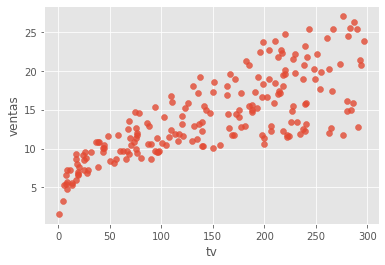

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=datos.tv, y=datos.ventas, alpha= 0.8)
ax.set_xlabel('tv')
ax.set_ylabel('ventas');

#### radio y ventas

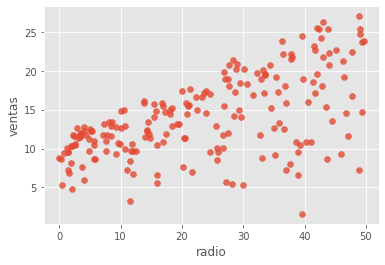

In [20]:

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=datos.radio, y=datos.ventas, alpha= 0.8)
ax.set_xlabel('radio')
ax.set_ylabel('ventas');

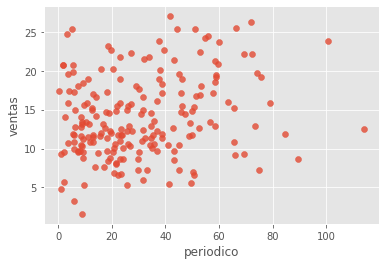

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=datos.periodico, y=datos.ventas, alpha= 0.8)
ax.set_xlabel('periodico')
ax.set_ylabel('ventas');

## Normalidad de los datos



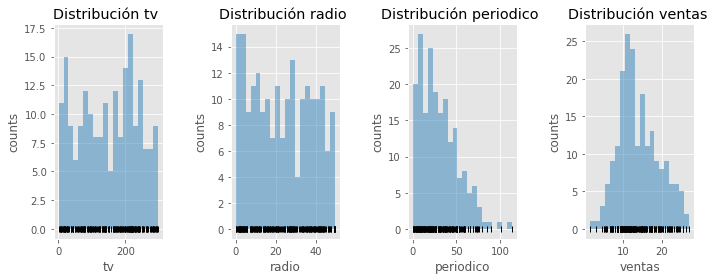

In [22]:
# Gráfico distribución variables
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 4))

axs[0].hist(x=datos.tv, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(datos.tv, np.full_like(datos.tv, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución tv ')
axs[0].set_xlabel('tv')
axs[0].set_ylabel('counts')

axs[1].hist(x=datos.radio, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(datos.radio, np.full_like(datos.radio, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución radio ')
axs[1].set_xlabel('radio')
axs[1].set_ylabel('counts')


axs[2].hist(x=datos.periodico, bins=20, color="#3182bd", alpha=0.5)
axs[2].plot(datos.periodico, np.full_like(datos.periodico, -0.01), '|k', markeredgewidth=1)
axs[2].set_title('Distribución periodico ')
axs[2].set_xlabel('periodico')
axs[2].set_ylabel('counts')

axs[3].hist(x=datos.ventas, bins=20, color="#3182bd", alpha=0.5)
axs[3].plot(datos.ventas, np.full_like(datos.ventas, -0.01), '|k', markeredgewidth=1)
axs[3].set_title('Distribución ventas ')
axs[3].set_xlabel('ventas')
axs[3].set_ylabel('counts')

plt.tight_layout();

## Correlación de las variables

Se raliza cálculo de correlación con Pandas



In [23]:
print("Correlación tv y ventas")
print('Correlación Pearson: ', datos['tv'].corr(datos['ventas'], method='pearson'))
print('Correlación spearman: ', datos['tv'].corr(datos['ventas'], method='spearman'))
print('Correlación kendall: ', datos['tv'].corr(datos['ventas'], method='kendall'))
print()

print("Correlación radio y ventas")
print('Correlación Pearson: ', datos['radio'].corr(datos['ventas'], method='pearson'))
print('Correlación spearman: ', datos['radio'].corr(datos['ventas'], method='spearman'))
print('Correlación kendall: ', datos['radio'].corr(datos['ventas'], method='kendall'))
print()

print("Correlación periodico y ventas")
print('Correlación Pearson: ', datos['periodico'].corr(datos['ventas'], method='pearson'))
print('Correlación spearman: ', datos['periodico'].corr(datos['ventas'], method='spearman'))
print('Correlación kendall: ', datos['periodico'].corr(datos['ventas'], method='kendall'))
print()


Correlación tv y ventas
Correlación Pearson:  0.7822244248616061
Correlación spearman:  0.8006143768505688
Correlación kendall:  0.6219463551009411

Correlación radio y ventas
Correlación Pearson:  0.5762225745710551
Correlación spearman:  0.5543037314053145
Correlación kendall:  0.41944746657916127

Correlación periodico y ventas
Correlación Pearson:  0.22829902637616528
Correlación spearman:  0.19492188424873094
Correlación kendall:  0.13227124597847204



## Crear el modelo de Regresión Lineal Múltiple

### Identificar variables independientes tres o cuatro variables numéricas

Las variables indepencientes del conjunto de datos son tv, radio y periodico y la variabe dependiente o de respuesta es ventas, de tal forma que una predicción estaría dada por la fórmula siguiente: 

$$
ventas = a + \beta_0 \cdot{tv} + \beta_1\cdot{radio} + \beta_2\cdot{periodico} + \epsilon
$$

### Crear datos de entrenamiento y validación

Crear datos de entrenamiento y validación


In [54]:
X = datos[['tv', 'radio', 'periodico']]
y = datos['ventas']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

entrenamiento = X_train
validacion = X_test


print(entrenamiento)
print(validacion)



        tv  radio  periodico
146  240.1    7.3        8.7
32    97.2    1.5       30.0
43   206.9    8.4       26.4
99   135.2   41.7       45.9
88    88.3   25.5       73.4
..     ...    ...        ...
152  197.6   23.3       14.2
116  139.2   14.3       25.6
53   182.6   46.2       58.7
38    43.1   26.7       35.1
47   239.9   41.5       18.5

[160 rows x 3 columns]
        tv  radio  periodico
197  177.0    9.3        6.4
157  149.8    1.3       24.3
31   112.9   17.4       38.6
48   227.2   15.8       49.9
63   102.7   29.6        8.4
59   210.7   29.5        9.3
5      8.7   48.9       75.0
7    120.2   19.6       11.6
117   76.4    0.8       14.8
108   13.1    0.4       25.6
141  193.7   35.4       75.6
54   262.7   28.8       15.9
102  280.2   10.1       21.4
131  265.2    2.9       43.0
172   19.6   20.1       17.0
155    4.1   11.6        5.7
126    7.8   38.9       50.6
29    70.6   16.0       40.8
74   213.4   24.6       13.1
65    69.0    9.3        0.9
137  273.7   28.9  

## Modelo de regresión lineal múltiple


In [32]:
from sklearn import linear_model
# Construyendo el modelo el algoritmo de regresión lineal a utilizar
modelo = linear_model.LinearRegression()

# Construyendo el modelo de regresión lineal múptiple con datos de entrenamiento
# Ajuste preparando y entrenanado el modelo
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Interpretar los valores constantes y los estadísticos significativos de cada variable





In [38]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()

print('Valor de las pendientes o coeficientes de cada variable tv, radio periódico:')
print(modelo.coef_)

print('Valor de la intersección o coeficiente a:')
print(modelo.intercept_)

print('Precisión del modelo:')
print(modelo.score(X_train, y_train))

print("Valor de R Adjusted")



DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes de cada variable tv, radio periódico:
[[0.04560079 0.18927341 0.00237545]]
Valor de la intersección o coeficiente a:
[2.8496683]
Precisión del modelo:
0.8938358233693335
Valor de R Adjusted
[1059.32564369  279.49004028  170.20664265]


### Identificar e Interpretar el valor de R Square Ajustado

Es la medida que refleja que tanto impacto o representatividad tienen las variables independientes sobre la variable dependiente.

Busquen que sea por encima del 50%

El valor de R square es de 0.8938 lo que significa que las variables representan un 89% el valor de las ventas, lo que cubre la expetativa del 50 establecida.



## Realizar predicciones con el modelo 

Utilizando alguos valores (observaciones o registros) del conjunto de datos de validacipon elaborar predicciones basados en la fórmula y también utilizando la función *predict*() de *Python*.



### Predicciones conforme a la fórmula

$$
ventas = 2.8496683 + 0.04560079  \cdot{tv} + 0.18927341 \cdot{radio} + 0.00237545\cdot{periodico} + \epsilon
$$

In [41]:
tv = 8.7
radio = 48.9     
periodico = 75.0

pred_ventas = (2.8496683+0.04560079 * tv) + (0.18927341 * radio) + (0.00237545 * periodico)


12.680023671999999

### Predicciones usando predict


In [68]:

print(X_test[0:6:])
pred_ventas_2 = modelo.predict(X_test[0:6:])
# pred_ventas_2

print(pred_ventas_2)



        tv  radio  periodico
197  177.0    9.3        6.4
157  149.8    1.3       24.3
31   112.9   17.4       38.6
48   227.2   15.8       49.9
63   102.7   29.6        8.4
59   210.7   29.5        9.3
[[12.69645443]
 [ 9.98444605]
 [11.38304742]
 [16.31922331]
 [13.15531642]
 [18.06341278]]


# Interpretación

Para valores de inversión en tv radio y periodico de 8.7,	48.9 y	75.0	el conjunto datos tiene un valor real de ventas igual a 7.2, la prediccion de un modelo de regresión lineal múltiple genera un valor de 12.68. Hay diferencia ya que se tiene una representatividad del 89% que lo indica el estadístico R Square.

# Referencia bibliográfica consultada

https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html

https://www.cienciadedatos.net/documentos/pystats05-correlacion-lineal-python.html